<a href="https://colab.research.google.com/github/vmagal1/basefinalebac/blob/main/mod12_ex03_regress%C3%A3o_m%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

%matplotlib inline

In [ ]:
tips = sns.load_dataset(name='tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
y, X = pt.dmatrices(formula_like='tip ~ sex + smoker + time + net_bill', data=tips)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
y, X = patsy.dmatrices(formula_like='tip ~ net_bill', data=tips)
modelo_sm1 = sm.OLS(y, X).fit()
modelo_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        19:08:49   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

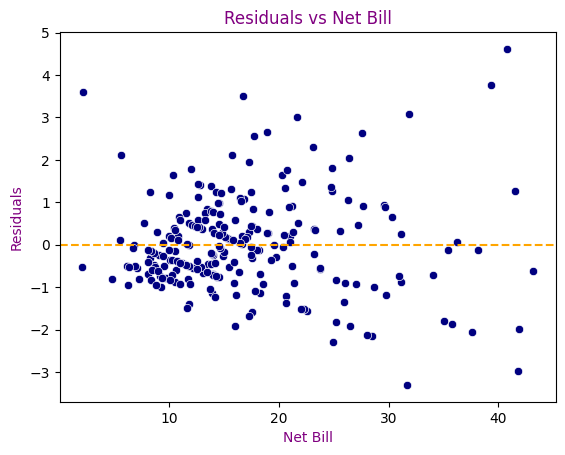

In [ ]:
sns.scatterplot(x='net_bill', y=results.resid, data=tips, color = 'navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Residuals', color = 'purple')
plt.title('Residuals vs Net Bill', color = 'purple')
plt.show()

In [ ]:
y_log, X_log = patsy.dmatrices('tip ~ np.log(net_bill)', data=tips)
model_log = sm.OLS(y_log, X_log)
results_log = model_log.fit()
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           4.40e-20
Time:                        19:10:07   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

In [ ]:
y_poly, X_poly = patsy.dmatrices('tip ~ net_bill + np.power(net_bill, 2)', data=tips)
model_poly = sm.OLS(y_poly, X_poly)
results_poly = model_poly.fit()
print(results_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           4.96e-22
Time:                        19:10:25   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

In [ ]:
print('`model_log` R²:', results_log.rsquared)
print('`model_poly` R²:', results_poly.rsquared)

`model_log` R²: 0.2944412513792951
`model_poly` R²: 0.3344216007656947


In [ ]:
best_model = 'log' if results_log.rsquared > results_poly.rsquared else 'poly'
print(f'O melhor modelo é com a transformação {best_model} de net_bill.')

O melhor modelo é com a transformação poly de net_bill.


,0
Intercept,1.330698
net_bill,0.099334


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
tips['log_tip'] = np.log(tips['tip'])
y_log_tip, X_log_tip = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', data=tips)


model_log_tip = sm.OLS(y_log_tip, X_log_tip)
results_log_tip = model_log_tip.fit()

In [ ]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill', data=tips)


model_log_tip = sm.OLS(y_log_tip, X_log_tip)
results_log_tip = model_log_tip.fit()

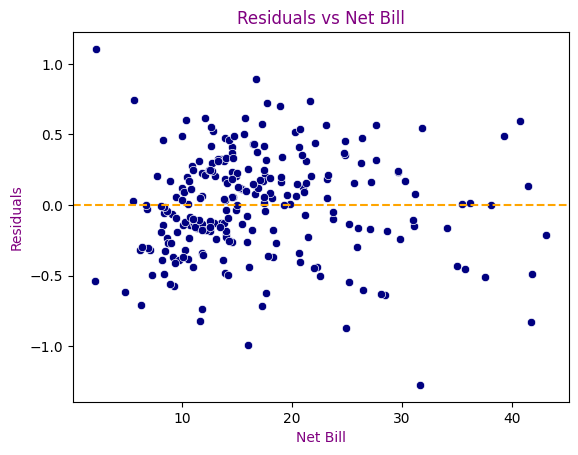

In [ ]:
sns.scatterplot(x='net_bill', y=results_log_tip.resid, data=tips, color = 'navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Residuals', color = 'purple')
plt.title('Residuals vs Net Bill', color = 'purple')
plt.show()

In [ ]:
y_log_net_bill, X_log_net_bill = patsy.dmatrices('log_tip ~ sex + smoker + time + np.log(net_bill)', data=tips)


model_log_net_bill = sm.OLS(y_log_net_bill, X_log_net_bill)
results_log_net_bill = model_log_net_bill.fit()

In [ ]:
y_poly_net_bill, X_poly_net_bill = patsy.dmatrices('log_tip ~ sex + smoker + time + net_bill + np.power(net_bill, 2)', data=tips)


model_poly_net_bill = sm.OLS(y_poly_net_bill, X_poly_net_bill)
results_poly_net_bill = model_poly_net_bill.fit()
print(f' log: {results_log_net_bill.rsquared}')
print(f' poly: {results_poly_net_bill.rsquared}')

 log: 0.3199911749998886
 poly: 0.3385709725067988


In [ ]:
best_model = 'log' if results_log_net_bill.rsquared > results_poly_net_bill.rsquared else 'poly'
print(f'O melhor modelo é com a transformação {best_model} de net_bill, pois é R² maior')


O melhor modelo é com a transformação poly de net_bill, pois é R² maior


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [ ]:
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res_renda_simples'] = reg_renda_simples.resid
print(reg_renda_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:17:41   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

In [ ]:
residuals = results.resid

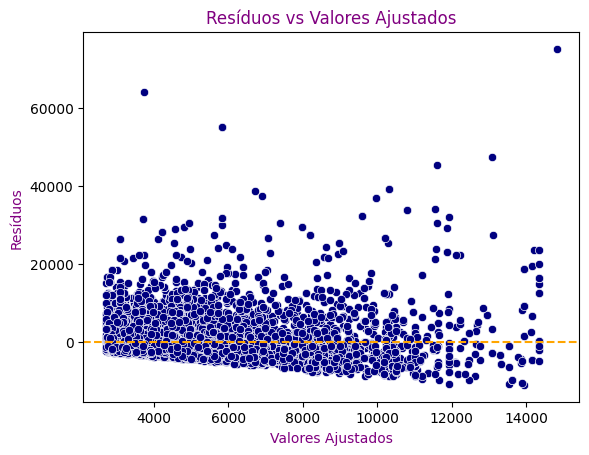

In [ ]:
# Calculate residuals directly from your fitted model
residuals = reg_renda_simples.resid

sns.scatterplot(x=reg_renda_simples.fittedvalues, y=residuals, color='navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Resíduos vs Valores Ajustados', color='purple')
plt.xlabel('Valores Ajustados', color='purple')
plt.ylabel('Resíduos', color='purple')
plt.show()

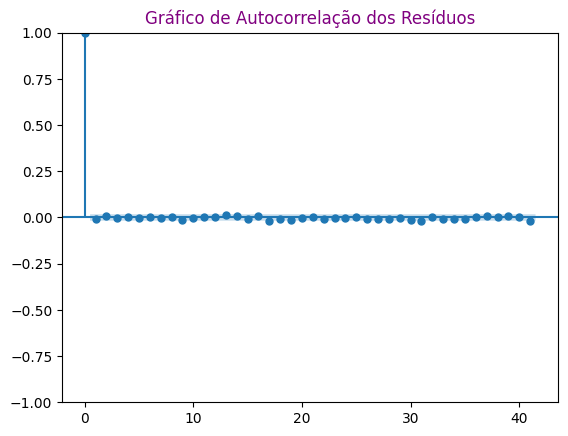

In [ ]:
sm.graphics.tsa.plot_acf(residuals)
plt.title('Gráfico de Autocorrelação dos Resíduos', color='purple')
plt.show()

In [ ]:
df['log_renda'] = np.log(df['renda'])
model_log = smf.ols('log_renda ~ tempo_emprego', data=df).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:21:24   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002

In [ ]:
model_multi = smf.ols('log_renda ~ tempo_emprego + idade + qtd_filhos', data=df).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     707.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                -13948.
No. Observations:               12466   AIC:                         2.790e+04
Df Residuals:                   12462   BIC:                         2.793e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6773      0.032    236.437

In [ ]:
model = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:21:37   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
insignificant_vars = model.pvalues[model.pvalues > 0.05].index.tolist()
significant_vars = [var for var in df.columns if var not in insignificant_vars]

# Ajustando novamente o modelo com as variáveis significativas
model_sig = smf.ols(f'renda ~ {" + ".join(significant_vars)}', data=df).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.340e+30
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:22:05   Log-Likelihood:             2.8276e+05
No. Observations:               12466   AIC:                        -5.654e+05
Df Residuals:                   12425   BIC:                        -5.651e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Text(0, 0.5, 'Resíduos')

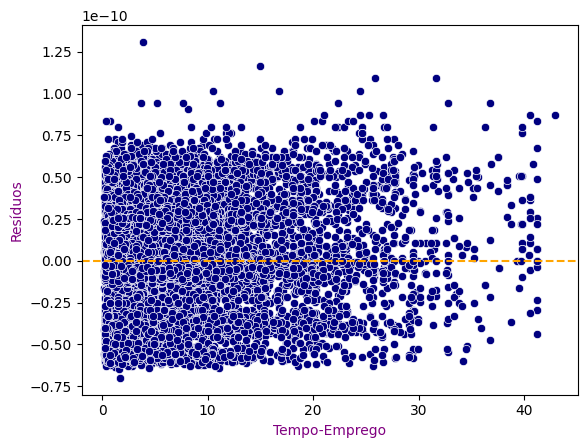

In [ ]:
residuals_multi = model_sig.resid

# Criando o gráfico de resíduos do modelo múltiplo
sns.scatterplot(x=df['tempo_emprego'], y=residuals_multi, color='navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Tempo-Emprego', color='purple')
plt.ylabel('Resíduos', color='purple')